# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [153]:
# !!pip uninstall tensorflow
# !pip install tensorflow==2.0.0

## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [124]:
#Set your project path 
project_path = '/content/drive/My Drive/Colab Notebooks/sequentail NLP/'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [12]:
import pandas as pd
import numpy as np
import os

In [190]:
os.chdir(project_path)

In [191]:
df=pd.read_json("Sarcasm_Headlines_Dataset.json",lines=True)

In [192]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [194]:
# There as no null /missing values

In [195]:
print('There are {0:0.0f} record and {1:0.0f} columns'.format(df.shape[0],df.shape[1]))

There are 26709 record and 3 columns


In [196]:
df.isnull().any()

article_link    False
headline        False
is_sarcastic    False
dtype: bool

In [197]:
# There are no null values

In [198]:
df.duplicated('headline').any()

True

In [199]:
#Thre are duplicate values

In [200]:
# drop duplcate values
df.drop_duplicates('headline',inplace=True)

In [201]:
print ('There are {0:0.0f} columns after duplicate removal'.format(df.shape[0])) 


There are 26602 columns after duplicate removal


In [202]:
df.headline.nunique()

26602

In [203]:
df.is_sarcastic.unique()

array([0, 1])

In [204]:
## There are 2 unique values

In [278]:
df.groupby('is_sarcastic')['is_sarcastic'].value_counts()/len(df)*100

is_sarcastic  is_sarcastic
0             0               56.202541
1             1               43.797459
Name: is_sarcastic, dtype: float64

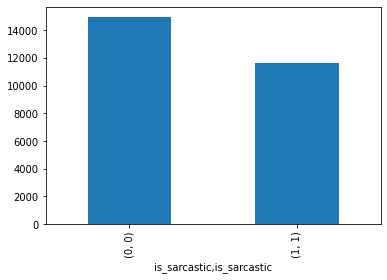

In [280]:
df.groupby('is_sarcastic')['is_sarcastic'].value_counts().plot.bar()

*both classes are almost equally distributed (56:44).

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [205]:
# drop column : artical_link
df.drop('article_link',inplace=True,axis=1)

In [206]:
# check for column drop
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [207]:
df.headline.str.len().sort_values(ascending=False)

19868    254
17306    238
15247    237
21783    228
11220    199
        ... 
22596      8
12208      8
11354      8
9973       8
20551      7
Name: headline, Length: 26602, dtype: int64

In [208]:
mxlen=np.max([len(i) for i in df.headline])

In [209]:
print('The max sequence length is {0:0.0f} and will be used during padding'.format(np.max([len(i) for i in df.headline])))

The max sequence length is 254 and will be used during padding


#**## Modelling**

## Import required modules required for modelling.

In [210]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [211]:
max_features = 10000
maxlen = mxlen
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [212]:
import tensorflow as tf

In [213]:
# initialize tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features) # num_words -> Vocablury size

In [214]:
#Fit tokenizer with headline data
tokenizer.fit_on_texts(df['headline'].tolist())

# Define X and y for your model.

In [215]:
# X will sequence of word replaced with index as per vocab
X = tokenizer.texts_to_sequences(df['headline'])

# pad up all headline row for equal length
X = pad_sequences(X, maxlen = maxlen)

# y will be array ouput of is sacastical column
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])


Number of Samples: 26602
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [216]:
# check the shape of X and y
print (X.shape)
print (y.shape)

(26602, 254)
(26602,)


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [217]:
#Vocabularya
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'this': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'report': 41,
 'into': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 's': 51,
 'says': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 'make': 71,
 'was': 72,
 'than': 73,
 "'": 74,
 'white': 75,
 'back': 76,
 'women': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

In [218]:
num_words = len(tokenizer.word_index)
num_words

29656

#**## Word Embedding**

## Get Glove Word Embeddings

In [219]:
glove_file = project_path + "glove.6B.zip"

In [220]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [221]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [222]:
embedding_matrix = np.zeros((num_words+1, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [223]:
embedding_matrix.shape

(29657, 200)

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [231]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [248]:
#Initialize the model
model = Sequential()

#Embedding layer
model.add(Embedding(num_words +1 ,200,weights = [embedding_matrix],trainable=False,input_length=maxlen))

#BiLSTM layer
model.add(Bidirectional(LSTM(128,return_sequences=False)))

#Dense layer
model.add(Dense(256,activation="relu"))

# output layer
model.add(Dense(1,activation="sigmoid"))


In [249]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 254, 200)          5931400   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 6,334,345
Trainable params: 402,945
Non-trainable params: 5,931,400
_________________________________________________________________


In [250]:
#Compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [251]:
batch_size = 100
epochs = 5

#Train the model
history = model.fit(X,y,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 21281 samples, validate on 5321 samples
Epoch 1/5
21281/21281 [==============================] - 390s 18ms/sample - loss: 0.5067 - accuracy: 0.7447 - val_loss: 0.4217 - val_accuracy: 0.8076
Epoch 2/5
21281/21281 [==============================] - 388s 18ms/sample - loss: 0.3670 - accuracy: 0.8345 - val_loss: 0.3537 - val_accuracy: 0.8438
Epoch 3/5
21281/21281 [==============================] - 394s 19ms/sample - loss: 0.2970 - accuracy: 0.8719 - val_loss: 0.3446 - val_accuracy: 0.8481
Epoch 4/5
21281/21281 [==============================] - 399s 19ms/sample - loss: 0.2493 - accuracy: 0.8950 - val_loss: 0.3440 - val_accuracy: 0.8536
Epoch 5/5
21281/21281 [==============================] - 437s 21ms/sample - loss: 0.2099 - accuracy: 0.9145 - val_loss: 0.3517 - val_accuracy: 0.8590


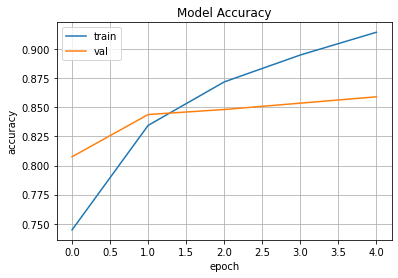

In [255]:
#Plot the training and validation accuracy
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()
plt.show()

* model start overfittig after one epoch ifself.
* We shall add dropout to reudce the overfitting

# model 2 with dropout

In [257]:

#Initialize the model
model2 = Sequential()

#Add Embedding layer
model2.add(Embedding(num_words +1 ,200,weights = [embedding_matrix],trainable=False,input_length=maxlen))

# BiLSTM layer with dropout

model2.add(Bidirectional(LSTM(128,return_sequences=False,dropout=.2)))


#Dense layer with dropout
model2.add(Dense(128,activation="relu"))

#Add an dropput layer
model2.add(Dropout(0.2))

#o/p layer
model2.add(Dense(1,activation="sigmoid"))

In [258]:
#Check the summary of the model
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 254, 200)          5931400   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 6,301,321
Trainable params: 369,921
Non-trainable params: 5,931,400
_________________________________________________________________


In [259]:
#Compile the model
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [261]:
batch_size = 100
epochs = 5

#Train the model
history2 = model2.fit(X,y,epochs=epochs,batch_size=batch_size,validation_split=0.2)

Train on 21281 samples, validate on 5321 samples
Epoch 1/5
21281/21281 [==============================] - 471s 22ms/sample - loss: 0.5261 - accuracy: 0.7350 - val_loss: 0.4276 - val_accuracy: 0.8023
Epoch 2/5
21281/21281 [==============================] - 463s 22ms/sample - loss: 0.3971 - accuracy: 0.8151 - val_loss: 0.3554 - val_accuracy: 0.8429
Epoch 3/5
21281/21281 [==============================] - 463s 22ms/sample - loss: 0.3390 - accuracy: 0.8493 - val_loss: 0.3442 - val_accuracy: 0.8457
Epoch 4/5
21281/21281 [==============================] - 461s 22ms/sample - loss: 0.3017 - accuracy: 0.8718 - val_loss: 0.3278 - val_accuracy: 0.8536
Epoch 5/5
21281/21281 [==============================] - 458s 22ms/sample - loss: 0.2710 - accuracy: 0.8829 - val_loss: 0.3208 - val_accuracy: 0.8624


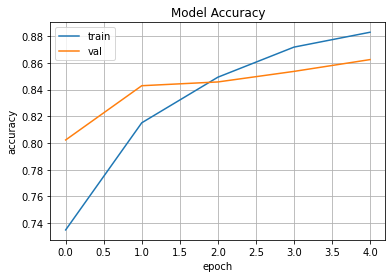

In [262]:
#Plot the training and validation accuracy 
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()
plt.show()



* model overift has  reduced  by 50% and validation accuracy has improved by ~1%
* LSTM model is able to significantly improved the classifcation accuracy compared to null model (56:44)